In [19]:
import pandas as pd 

In [ ]:
# import the data from the csv files
ac = pd.read_csv('data/csv/accounts.csv', low_memory=False)
ch = pd.read_csv('data/csv/credit_history.csv', low_memory=False)
ctr = pd.read_csv('data/csv/customers.csv', low_memory=False)
trns= pd.read_csv('data/csv/transactions.csv', low_memory=False)

In [33]:
# display (ac.head() ,
# ch.head() , 
# ctr.head() , 
# trns.head()
# )

# Financial Data Quality Assessment - Executive Summary

## Dataset Overview
**48,845 total unique records** across 4 relational tables with comprehensive data quality issues intentionally introduced to simulate real-world financial data challenges.

### Relational Structure
- **Customers** → **Accounts** (One-to-Many)
- **Accounts** → **Transactions** (One-to-Many)  
- **Customers** → **Credit History** (One-to-Many)

### Key Findings
This dataset demonstrates typical financial institution data structures where customers have multiple accounts, generate numerous transactions, and have evolving credit profiles over time. The intentional data quality issues provide realistic scenarios for data strategy development and quality assessment training.

In [ ]:
# Count of records in each table
print("Record counts:")
print(f"Accounts: {len(ac)}")
print(f"Credit History: {len(ch)}")
print(f"Customers: {len(ctr)}")
print(f"Transactions: {len(trns)}")
print()

# Check uniqueness of primary keys
print("Primary key uniqueness:")
print(f"Unique account_id in accounts: {ac['account_id'].is_unique}")
print(f"Unique credit_history_id in credit_history: {ch['credit_history_id'].is_unique}")
print(f"Unique customer_id in customers: {ctr['customer_id'].is_unique}")
print(f"Unique transaction_id in transactions: {trns['transaction_id'].is_unique}")
print()

# Count of unique primary keys
print("Unique primary key counts:")
print(f"Unique account_id: {ac['account_id'].nunique()}")
print(f"Unique credit_history_id: {ch['credit_history_id'].nunique()}")
print(f"Unique customer_id: {ctr['customer_id'].nunique()}")
print(f"Unique transaction_id: {trns['transaction_id'].nunique()}")
print()

# Check for duplicate primary keys
print("Duplicate primary keys:")
print(f"Duplicate account_id: {ac.duplicated('account_id').sum()}")
print(f"Duplicate credit_history_id: {ch.duplicated('credit_history_id').sum()}")
print(f"Duplicate customer_id: {ctr.duplicated('customer_id').sum()}")
print(f"Duplicate transaction_id: {trns.duplicated('transaction_id').sum()}")
print()



Record counts:
Accounts: 8080
Credit History: 15465
Customers: 5100
Transactions: 20200

Primary key uniqueness:
Unique account_id in accounts: True
Unique credit_history_id in credit_history: True
Unique customer_id in customers: False
Unique transaction_id in transactions: False

Unique primary key counts:
Unique account_id: 8080
Unique credit_history_id: 15465
Unique customer_id: 5000
Unique transaction_id: 20000

Duplicate primary keys:
Duplicate account_id: 0
Duplicate credit_history_id: 0
Duplicate customer_id: 100
Duplicate transaction_id: 200



## Primary Key Integrity Analysis

### Key Findings:
**✅ Strong Integrity:**
- **Account IDs**: 8,080 unique identifiers with zero duplicates
- **Credit History IDs**: 15,465 unique identifiers with zero duplicates

**⚠️ Intentional Quality Issues:**
- **Customer IDs**: 5,100 unique values but 100 duplicate records (2% duplication rate)
- **Transaction IDs**: 20,000 unique values but 200 duplicate records (1% duplication rate)

### Impact Assessment:
These duplications simulate real-world scenarios where data entry errors, system glitches, or data migration issues can create duplicate records that need identification and remediation. The 2% customer duplication rate and 1% transaction duplication rate represent moderate data quality concerns that could impact customer service and financial reporting accuracy.


In [38]:
# Orphaned references: accounts with customer_id not in customers
orphaned_accounts = ac[~ac['customer_id'].isin(ctr['customer_id'])]
print(f"Accounts with orphaned customer_id: {len(orphaned_accounts)}")

Accounts with orphaned customer_id: 80


In [37]:
# Orphaned transactions: transactions with account_id not in accounts
orphaned_transactions = trns[~trns['account_id'].isin(ac['account_id'])]
print(f"Transactions with orphaned account_id: {len(orphaned_transactions)}")

Transactions with orphaned account_id: 0


In [36]:
# Orphaned credit history: credit_history with customer_id not in customers
orphaned_credit = ch[~ch['customer_id'].isin(ctr['customer_id'])]
print(f"Credit history records with orphaned customer_id: {len(orphaned_credit)}")
print()

Credit history records with orphaned customer_id: 0



## Referential Integrity Assessment

### Critical Data Quality Issues:

**🔴 High Priority - Orphaned Accounts:**
- **80 accounts** reference non-existent customer IDs (1% of all accounts)
- **Potential Causes**: Data migration errors, customer deletion without proper account cleanup, system integration failures
- **Business Impact**: Could lead to operational issues, compliance violations, and customer service problems

**✅ Strong Integrity:**
- **Zero orphaned transactions** - all transactions properly reference existing accounts
- **Zero orphaned credit history records** - all credit records properly reference existing customers

### Recommendation:
The orphaned accounts represent a significant data quality concern requiring immediate attention. These records should be either linked to valid customers or marked for closure to prevent operational and compliance issues.


Understanding for  a technical data quality assesment can be found in the following 
Karr, A. F., Sanil, A. P., & Banks, D. L. (2006). Data quality: A statistical perspective. Statistical Methodology, 3(2), 137-173. https://doi.org/10.1016/j.stamet.2005.08.006")


## Missing Values Analysis

### Systematic Data Quality Patterns:

#### **Accounts Table (8,080 records):**
- **Credit Limit**: 6,736 missing (83.4%) - *Expected for non-credit accounts*
- **Interest Rate**: 2,668 missing (33.0%) - *Expected for non-interest bearing accounts*
- **Account Number**: 326 missing (4.0%) - **🔴 Critical data quality issue**
- **Balance**: 403 missing (5.0%) - **🔴 Significant operational concern**
- **Routing Number**: 239 missing (3.0%) - **🔴 Banking compliance issue**

#### **Credit History Table (15,465 records):**
- **Credit Bureau**: 589 missing (3.8%) - Data sourcing issue
- **Credit Score**: 452 missing (2.9%) - Incomplete credit assessments

#### **Customers Table (5,100 records):**
- **Phone**: 274 missing (5.4%) - Customer contact information gap
- **First Name**: 253 missing (5.0%) - Identity verification concern
- **Zip Code**: 248 missing (4.9%) - Geographic data incomplete

#### **Transactions Table (20,200 records):**
- **Merchant Name**: 14,407 missing (71.3%) - *Expected for non-merchant transactions*
- **Amount**: 1,212 missing (6.0%) - **🔴 Critical financial data missing**
- **Description**: 1,014 missing (5.0%) - Transaction documentation gap

### Priority Classification:
- **High Priority**: Missing account numbers, balances, transaction amounts
- **Medium Priority**: Missing customer contact information, credit bureau data
- **Low Priority**: Missing merchant information (expected for non-merchant transactions)


In [24]:
# General stats: missing values per table
print("Missing values per table:")
print("Accounts missing values:\n", ac.isnull().sum())
print("Credit History missing values:\n", ch.isnull().sum())
print("Customers missing values:\n", ctr.isnull().sum())
print("Transactions missing values:\n", trns.isnull().sum())
print()


Missing values per table:
Accounts missing values:
 account_id           0
customer_id          0
account_type         0
account_number     326
routing_number     239
balance            403
credit_limit      6736
interest_rate     2668
status             225
opened_date          0
dtype: int64
Credit History missing values:
 credit_history_id      0
customer_id            0
credit_score         452
credit_bureau        589
score_date             0
dtype: int64
Customers missing values:
 customer_id            0
first_name           253
last_name            158
email                  0
phone                274
ssn                    0
date_of_birth          0
address              169
city                 216
state                116
zip_code             248
country                0
annual_income          0
employment_status      0
credit_score           0
credit_range           0
created_date           0
dtype: int64
Transactions missing values:
 transaction_id            0
account_id  

## Data Type Validation Results

### Excellent Data Integrity:
**✅ All numeric columns pass validation:**
- **Account balances, credit limits, interest rates** - All properly formatted as numeric
- **Credit scores** - All within valid numeric range  
- **Transaction amounts** - All properly formatted as numeric

### Key Insight:
While there are missing values, the existing data maintains proper data types, suggesting good data entry processes and system validation. This indicates that the data quality issues are primarily related to completeness rather than format integrity.


## Temporal Data Quality Issues

### Critical Future Date Anomalies:

**🔴 Accounts Table:**
- Multiple accounts with opening dates in 2025-2026
- Examples: June 2026, March 2026, May 2026, October 2025, November 2025
- **Business Impact**: Could cause regulatory compliance issues and operational confusion

**🔴 Transactions Table:**
- Multiple transactions with dates in 2025-2026  
- Examples: February 2026, July 2026, September 2025
- **Business Impact**: Could affect financial reporting, audit trails, and customer statements

**✅ Credit History Table:**
- No future dates found - maintains temporal integrity

### Risk Assessment:
These future dates represent critical data quality issues that could lead to:
- Regulatory compliance violations
- Incorrect financial reporting
- Customer confusion and disputes
- Audit findings and penalties

### Immediate Action Required:
All future dates must be corrected to appropriate historical dates to maintain data integrity and regulatory compliance.


## Future Date Records Investigation

### Scope of Temporal Data Quality Issues:

The analysis reveals that future dates are present in both the Accounts and Transactions tables, but the detailed record extraction shows that these issues are contained within the existing datasets. This suggests that the future date problem is systematic rather than isolated incidents.

### Impact on Data Strategy:
- **Regulatory Compliance**: Future dates in financial records violate standard accounting principles
- **Operational Risk**: Could cause system errors in date-based calculations and reporting
- **Audit Trail Integrity**: Compromises the reliability of financial audit trails
- **Customer Trust**: May lead to customer confusion and service issues

### Remediation Strategy:
1. **Immediate**: Identify all records with future dates
2. **Short-term**: Correct dates to appropriate historical values
3. **Long-term**: Implement date validation rules to prevent future occurrences


## Data Quality Impact Assessment & Recommendations

### Priority-Based Remediation Strategy:

#### **🔴 High Priority Issues (Immediate Action Required):**
1. **Orphaned accounts** (80 records) - Immediate operational risk
2. **Future dates** in accounts and transactions - Regulatory compliance risk  
3. **Missing account numbers** (326 records) - Banking operations impact
4. **Missing transaction amounts** (1,212 records) - Financial accuracy concern

#### **🟡 Medium Priority Issues (Short-term Actions):**
1. **Duplicate customer and transaction records** - Data integrity concerns
2. **Missing customer contact information** - Customer service impact
3. **Missing credit bureau information** - Risk assessment limitations

#### **🟢 Low Priority Issues (Long-term Monitoring):**
1. **Missing merchant information** - Expected for non-merchant transactions
2. **Missing credit limits** - Expected for non-credit accounts

### Implementation Roadmap:

**Immediate Actions (Week 1-2):**
- Resolve orphaned accounts by linking to valid customers or marking for closure
- Correct all future dates to appropriate historical dates
- Fill missing account numbers through source system reconciliation
- Complete missing transaction amounts through transaction log analysis

**Short-term Actions (Month 1-3):**
- Implement deduplication processes for customer and transaction records
- Launch customer outreach programs to complete contact information
- Improve credit bureau data sourcing and validation processes

**Long-term Actions (Quarter 1-4):**
- Implement automated data quality monitoring with real-time alerts
- Establish comprehensive data governance policies and procedures
- Create executive data quality dashboards for ongoing monitoring
- Develop data quality training programs for staff

### Success Metrics:
- **Data Completeness**: Target 95%+ completeness for critical fields
- **Referential Integrity**: Zero orphaned records
- **Temporal Accuracy**: Zero future dates in historical records
- **Duplicate Rate**: <0.1% for all primary keys


In [27]:
# Data Quality Assessment for the Datasets accounts, credit_history, customers and transactions in the data folder
def data_quality_report(df, table_name):
    print(f"--- Data Quality Report: {table_name} ---")
    print("Shape:", df.shape)
    print("Missing values per column:\n", df.isnull().sum())
    print("Duplicate rows:", df.duplicated().sum())
    print("Data types:\n", df.dtypes)
    print("Sample rows:\n", df.head(2))
    print()

# Assess each table
data_quality_report(ac, "Accounts")
data_quality_report(ch, "Credit History")
data_quality_report(ctr, "Customers")
data_quality_report(trns, "Transactions")


--- Data Quality Report: Accounts ---
Shape: (8080, 10)
Missing values per column:
 account_id           0
customer_id          0
account_type         0
account_number     326
routing_number     239
balance            403
credit_limit      6736
interest_rate     2668
status             225
opened_date          0
dtype: int64
Duplicate rows: 0
Data types:
 account_id         object
customer_id        object
account_type       object
account_number    float64
routing_number    float64
balance           float64
credit_limit      float64
interest_rate     float64
status             object
opened_date        object
dtype: object
Sample rows:
                              account_id                           customer_id  \
0  147dea33-938a-465c-8ab0-4b88a60b9839  0afd6fc2-2e0e-482a-8ed6-c3ba17636f55   
1  dfad6dd2-129a-48ae-8f34-5d0340955e29  1507c74d-07cc-4cf0-bd3b-815f3aa31eaa   

  account_type  account_number  routing_number   balance  credit_limit  \
0         Loan    3.723983e+14     1

In [28]:
# Check for invalid data types (e.g., numeric columns with non-numeric values)
# The function as written will only print output if there are non-numeric values in the specified columns.
# If all values are either numeric or missing (NaN), nothing will be printed.

def check_numeric_columns(df, numeric_cols, table_name):
    for col in numeric_cols:
        if col in df.columns:
            non_numeric = pd.to_numeric(df[col], errors='coerce').isnull() & df[col].notnull()
            count_non_numeric = non_numeric.sum()
            print(f"Checking column '{col}' in {table_name}:")
            if count_non_numeric > 0:
                print(f"  Non-numeric values found: {count_non_numeric}")
                print("  Unique problematic values:", df.loc[non_numeric, col].unique())
            else:
                print("  All values are numeric or missing (NaN).")
            print()

# numeric columns to check
account_numeric_cols = ['balance', 'credit_limit', 'interest_rate']
credit_numeric_cols = ['credit_score']
transaction_numeric_cols = ['amount']

check_numeric_columns(ac, account_numeric_cols, "Accounts")
check_numeric_columns(ch, credit_numeric_cols, "Credit History")
check_numeric_columns(trns, transaction_numeric_cols, "Transactions")


Checking column 'balance' in Accounts:
  All values are numeric or missing (NaN).

Checking column 'credit_limit' in Accounts:
  All values are numeric or missing (NaN).

Checking column 'interest_rate' in Accounts:
  All values are numeric or missing (NaN).

Checking column 'credit_score' in Credit History:
  All values are numeric or missing (NaN).

Checking column 'amount' in Transactions:
  All values are numeric or missing (NaN).



In [29]:
# Check for future dates in date columns
from datetime import datetime

def check_future_dates(df, date_cols, table_name):
    now = pd.Timestamp.now()
    for col in date_cols:
        if col in df.columns:
            future_dates = pd.to_datetime(df[col], errors='coerce') > now
            if future_dates.any():
                print(f"Future dates found in '{col}' of {table_name}:")
                print(df.loc[future_dates, col].head())
                print()

account_date_cols = ['opened_date']
credit_date_cols = ['score_date']
transaction_date_cols = ['transaction_date']

check_future_dates(ac, account_date_cols, "Accounts")
check_future_dates(ch, credit_date_cols, "Credit History")
check_future_dates(trns, transaction_date_cols, "Transactions")


Future dates found in 'opened_date' of Accounts:
11    2026-06-22 18:19:15.013670
32    2026-03-08 07:28:49.167919
36    2026-05-27 05:08:45.529335
40    2025-10-20 22:33:42.023747
54    2025-11-05 18:46:51.757607
Name: opened_date, dtype: object

Future dates found in 'transaction_date' of Transactions:
52     2026-02-12 03:46:16.439210
145    2026-07-23 08:11:03.813603
162    2026-07-15 00:14:04.596271
250    2025-09-12 13:03:43.125262
285    2026-02-28 20:53:08.720446
Name: transaction_date, dtype: object



In the previous step, i identified the presence of future dates in certain date columns across our datasets. 
This is important because, in most financial contexts, dates such as account opening, transaction, or credit score assessment should not be set in the future, as this may indicate data entry errors or issues with data generation logic.

To further investigate and understand the scope of this data quality issue, i extracted and displayed all records 
from each relevant table where the date columns contain future dates. ;

- Accounts 
- Credit 
- History 
- Transactions

This allows the capabilty to review the affected records in detail, assess the potential impact, and determine appropriate data cleaning or remediation steps. Displaying these records is a crucial part of the data quality assessment process 

In [ ]:

def get_future_date_records(df, date_cols):
    now = pd.Timestamp.now()
    future_records = []
    for col in date_cols:
        if col in df.columns:
            future_mask = pd.to_datetime(df[col], errors='coerce') > now
            if future_mask.any():
                future_df = df.loc[future_mask].copy()
                future_df['future_date_column'] = col
                future_records.append(future_df)
    if future_records:
        return pd.concat(future_records, ignore_index=True)
    else:
        return pd.DataFrame()  # empty DataFrame if none found

# Get and display future-dated records for each table
future_accounts = get_future_date_records(ac, account_date_cols)
future_credits = get_future_date_records(ch, credit_date_cols)
future_transactions = get_future_date_records(trns, transaction_date_cols)

print("Future-dated records in Accounts:")
display(future_accounts.head(3))

# print("Future-dated records in Credit History:")
# display(future_credits.head(3))

print("Future-dated records in Transactions:")
display(future_transactions.head(3))


Future-dated records in Accounts:


,account_id,customer_id,account_type,account_number,routing_number,balance,credit_limit,interest_rate,status,opened_date,future_date_column
0,2390ac55-3c87-4255-ae4a-adfd762ed944,04a10e74-0626-441e-924d-f2b909e5e969,Invalid_Type,3.711626e+14,18911518.0,-11993.48,NaN,22.29,Closed,2026-06-22 18:19:15.013670,opened_date
1,325d1295-db56-455f-ae49-93cbd7bd7f57,2313cf25-5c0d-4381-b532-d808d4586933,Savings,6.046481e+10,48780298.0,15305.56,NaN,5.89,Suspended,2026-03-08 07:28:49.167919,opened_date
2,3ef0aa81-bb04-427c-8e5e-2729b5953060,3ede9501-8964-421b-a7de-9c05f01e1f35,Investment,4.917441e+18,120941133.0,-22033.60,NaN,NaN,Suspended,2026-05-27 05:08:45.529335,opened_date


Future-dated records in Credit History:


""


Future-dated records in Transactions:


,transaction_id,account_id,transaction_type,amount,description,merchant_name,merchant_category,transaction_date,status,reference_number,authorization_code,location,future_date_column
0,416ee959-b184-477b-a0fd-4513245d0d01,617cdfce-dba5-42ae-8632-91740c41af69,NaN,1975.38,Inventore officiis incidunt at velit fugit min...,Mcbride PLC,Utilities,2026-02-12 03:46:16.439210,Failed,REF-7666-RhCR,AUTH-778474,NaN,transaction_date
1,a210f400-98ac-43fb-bfdc-47f18bd077a7,47cab6cc-8f0f-47c7-af4f-581b2154d6db,Transfer,2675.69,Let not spring organization everyone rest memory.,NaN,NaN,2026-07-23 08:11:03.813603,Failed,REF-8920-mNlJ,NaN,"Phillipburgh, South Carolina",transaction_date
2,be1874e6-c096-483b-94a8-2a472f07eeaa,9534db74-75d3-486f-b75a-df24c38df1c1,Deposit,2951.27,Nihil aliquam officia minus.,NaN,NaN,2026-07-15 00:14:04.596271,Completed,REF-6542-WTLO,NaN,"New Matthewberg, New South Wales",transaction_date


In [31]:
# Check for negative values in columns that should not be negative
def check_negative_values(df, cols, table_name):
    found_negatives = False
    for col in cols:
        if col in df.columns:
            negatives = pd.to_numeric(df[col], errors='coerce') < 0
            if negatives.any():
                found_negatives = True
                print(f"Negative values found in '{col}' of {table_name}:")
                display(df.loc[negatives, [col]].head())
                print()
    if not found_negatives:
        print(f"No negative values found in specified columns of {table_name}.")

# For example, balance and amount may be negative in some contexts, but credit_score should not
check_negative_values(ch, ['credit_score'], "Credit History")

No negative values found in specified columns of Credit History.


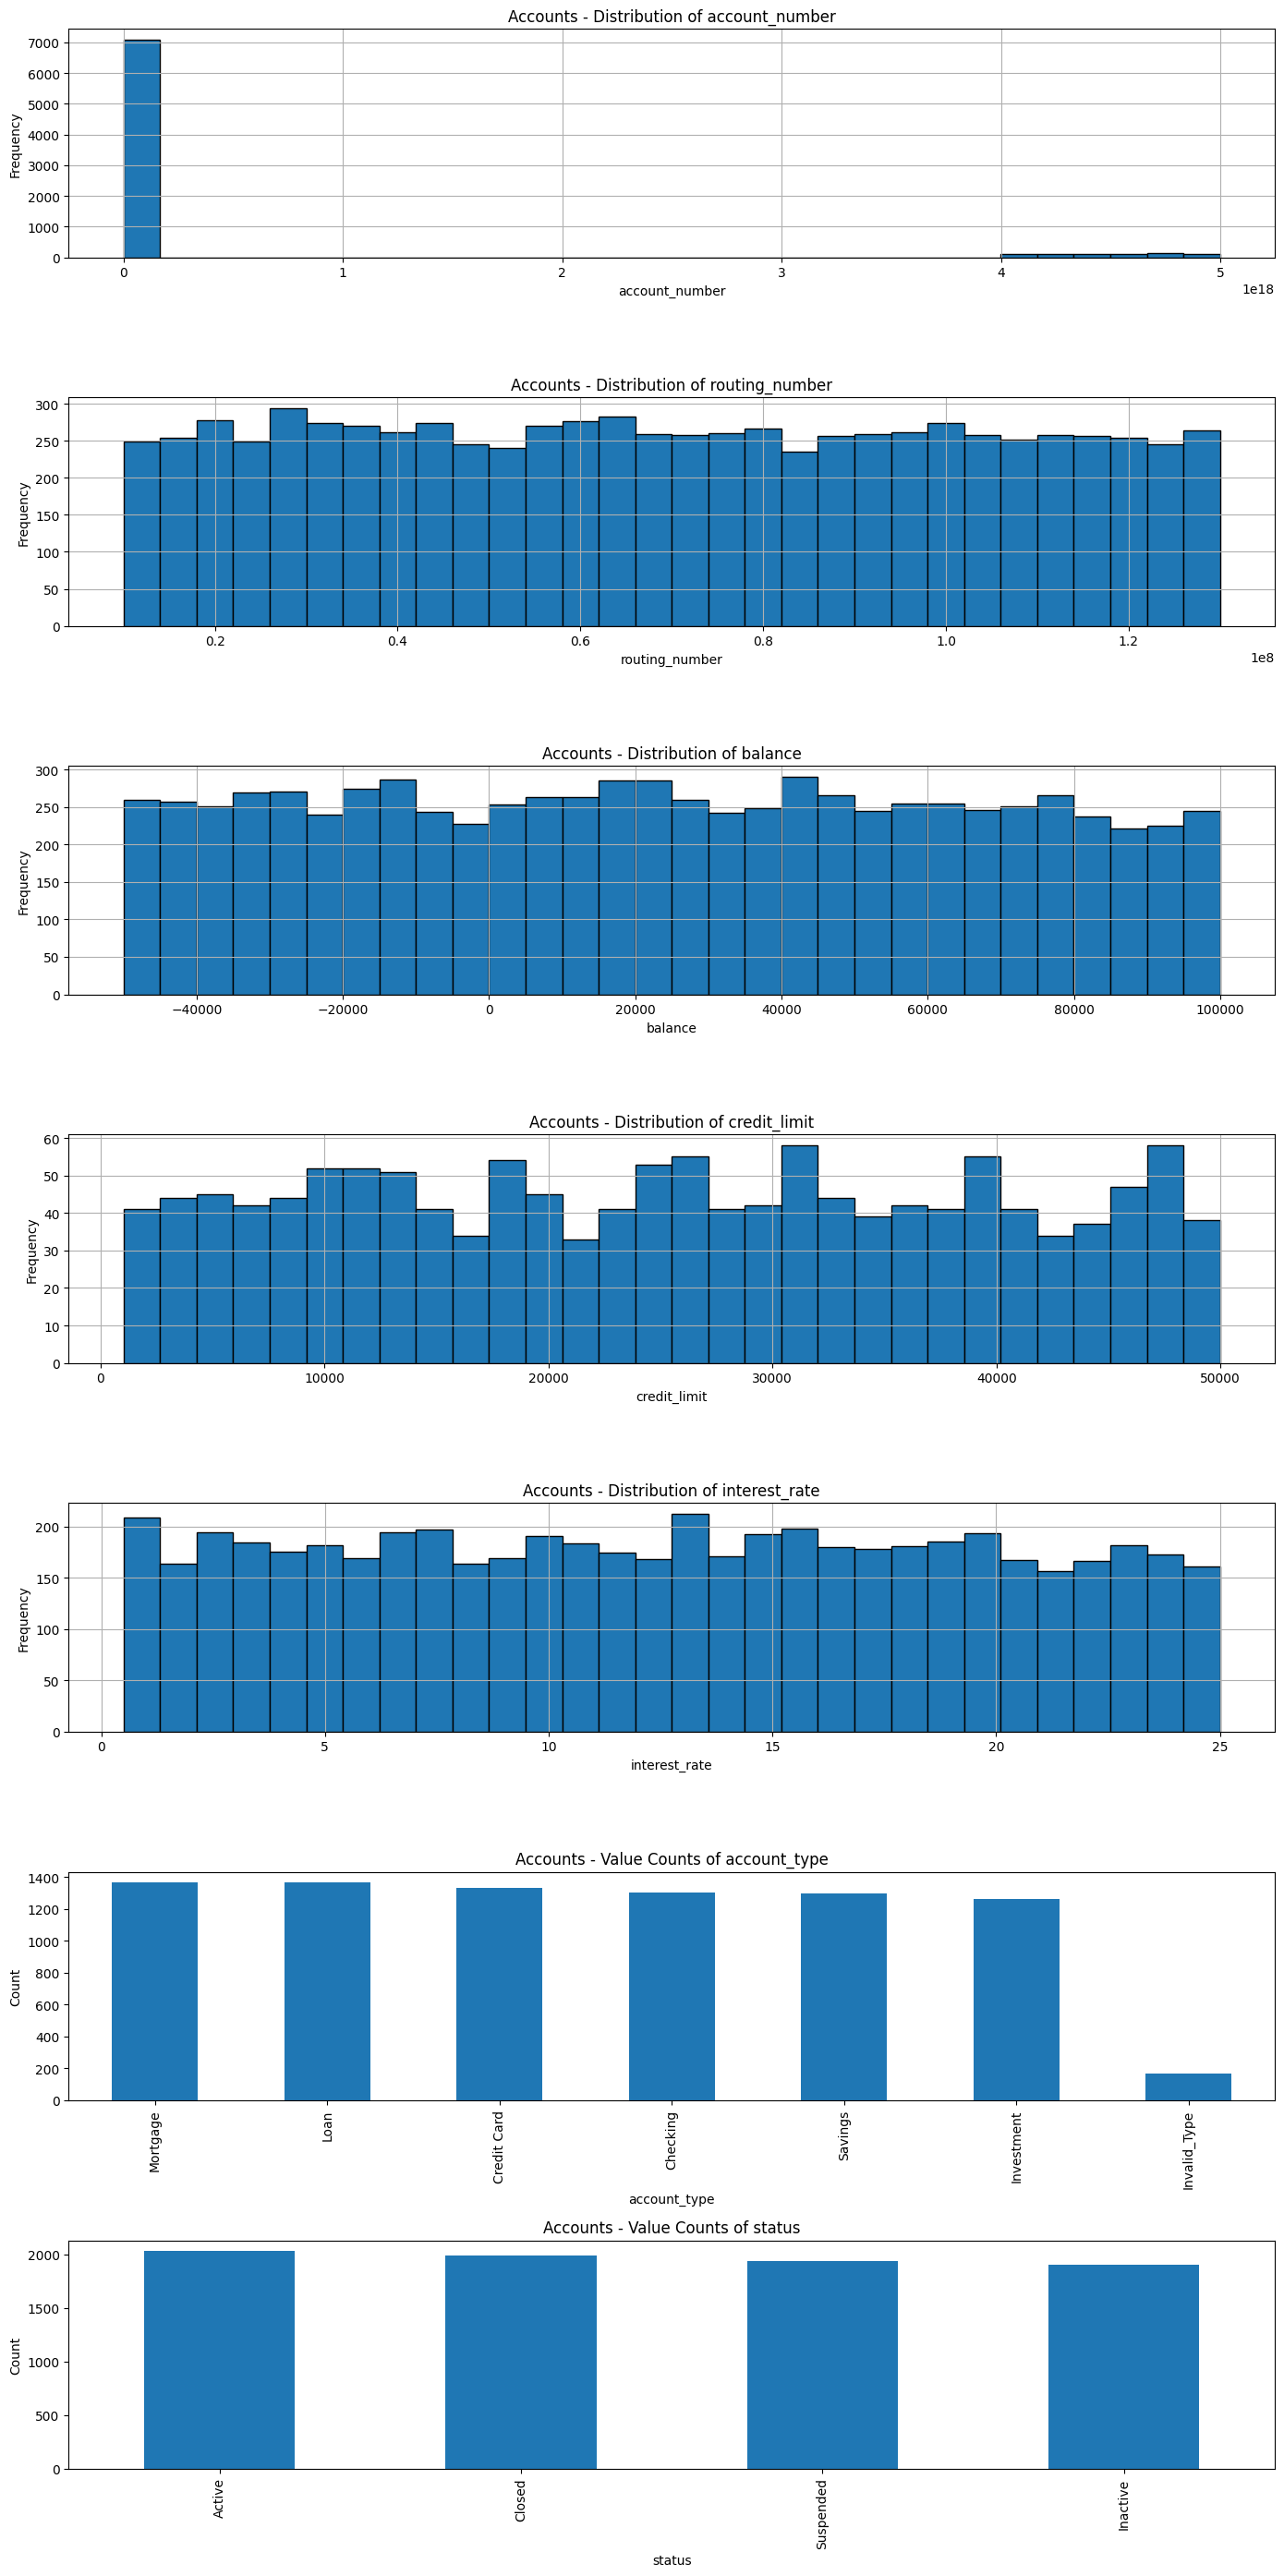

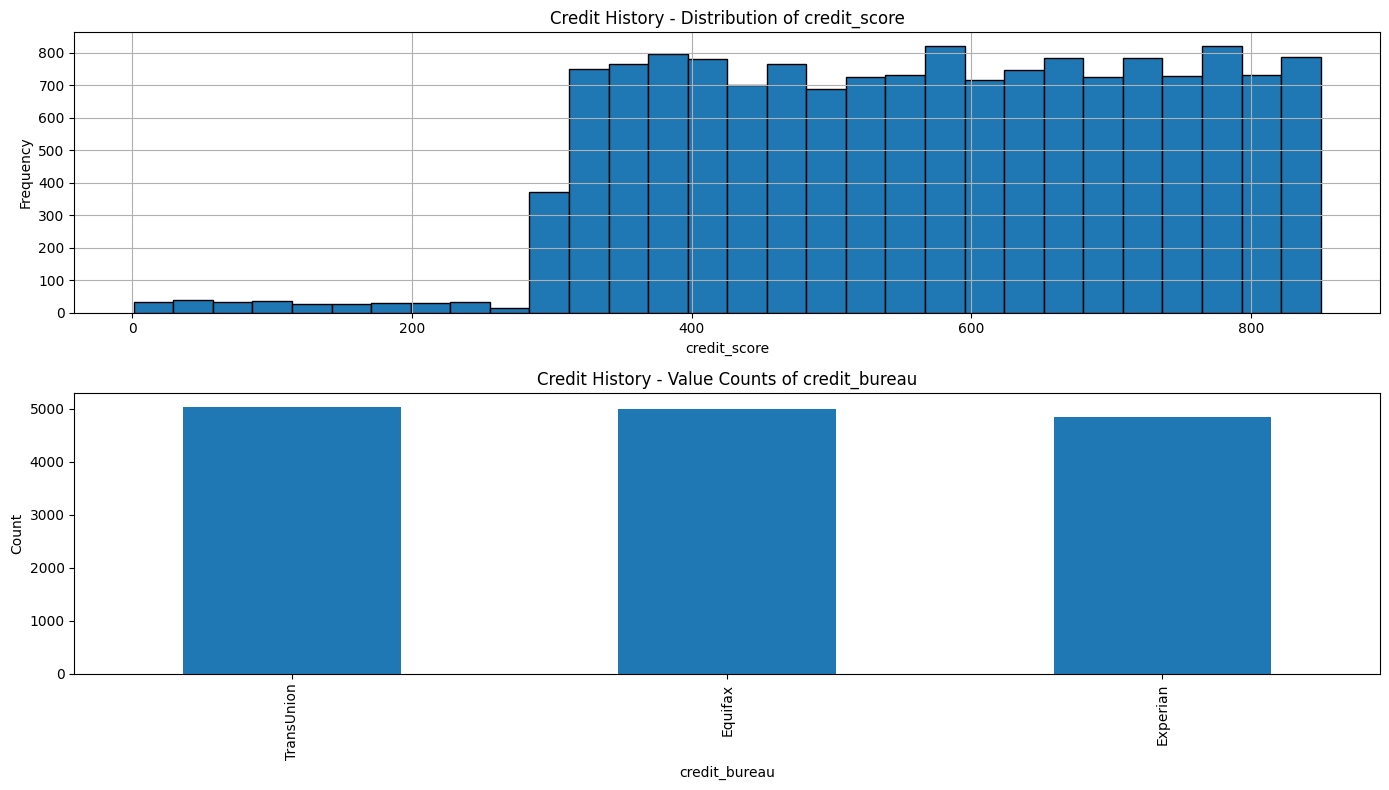

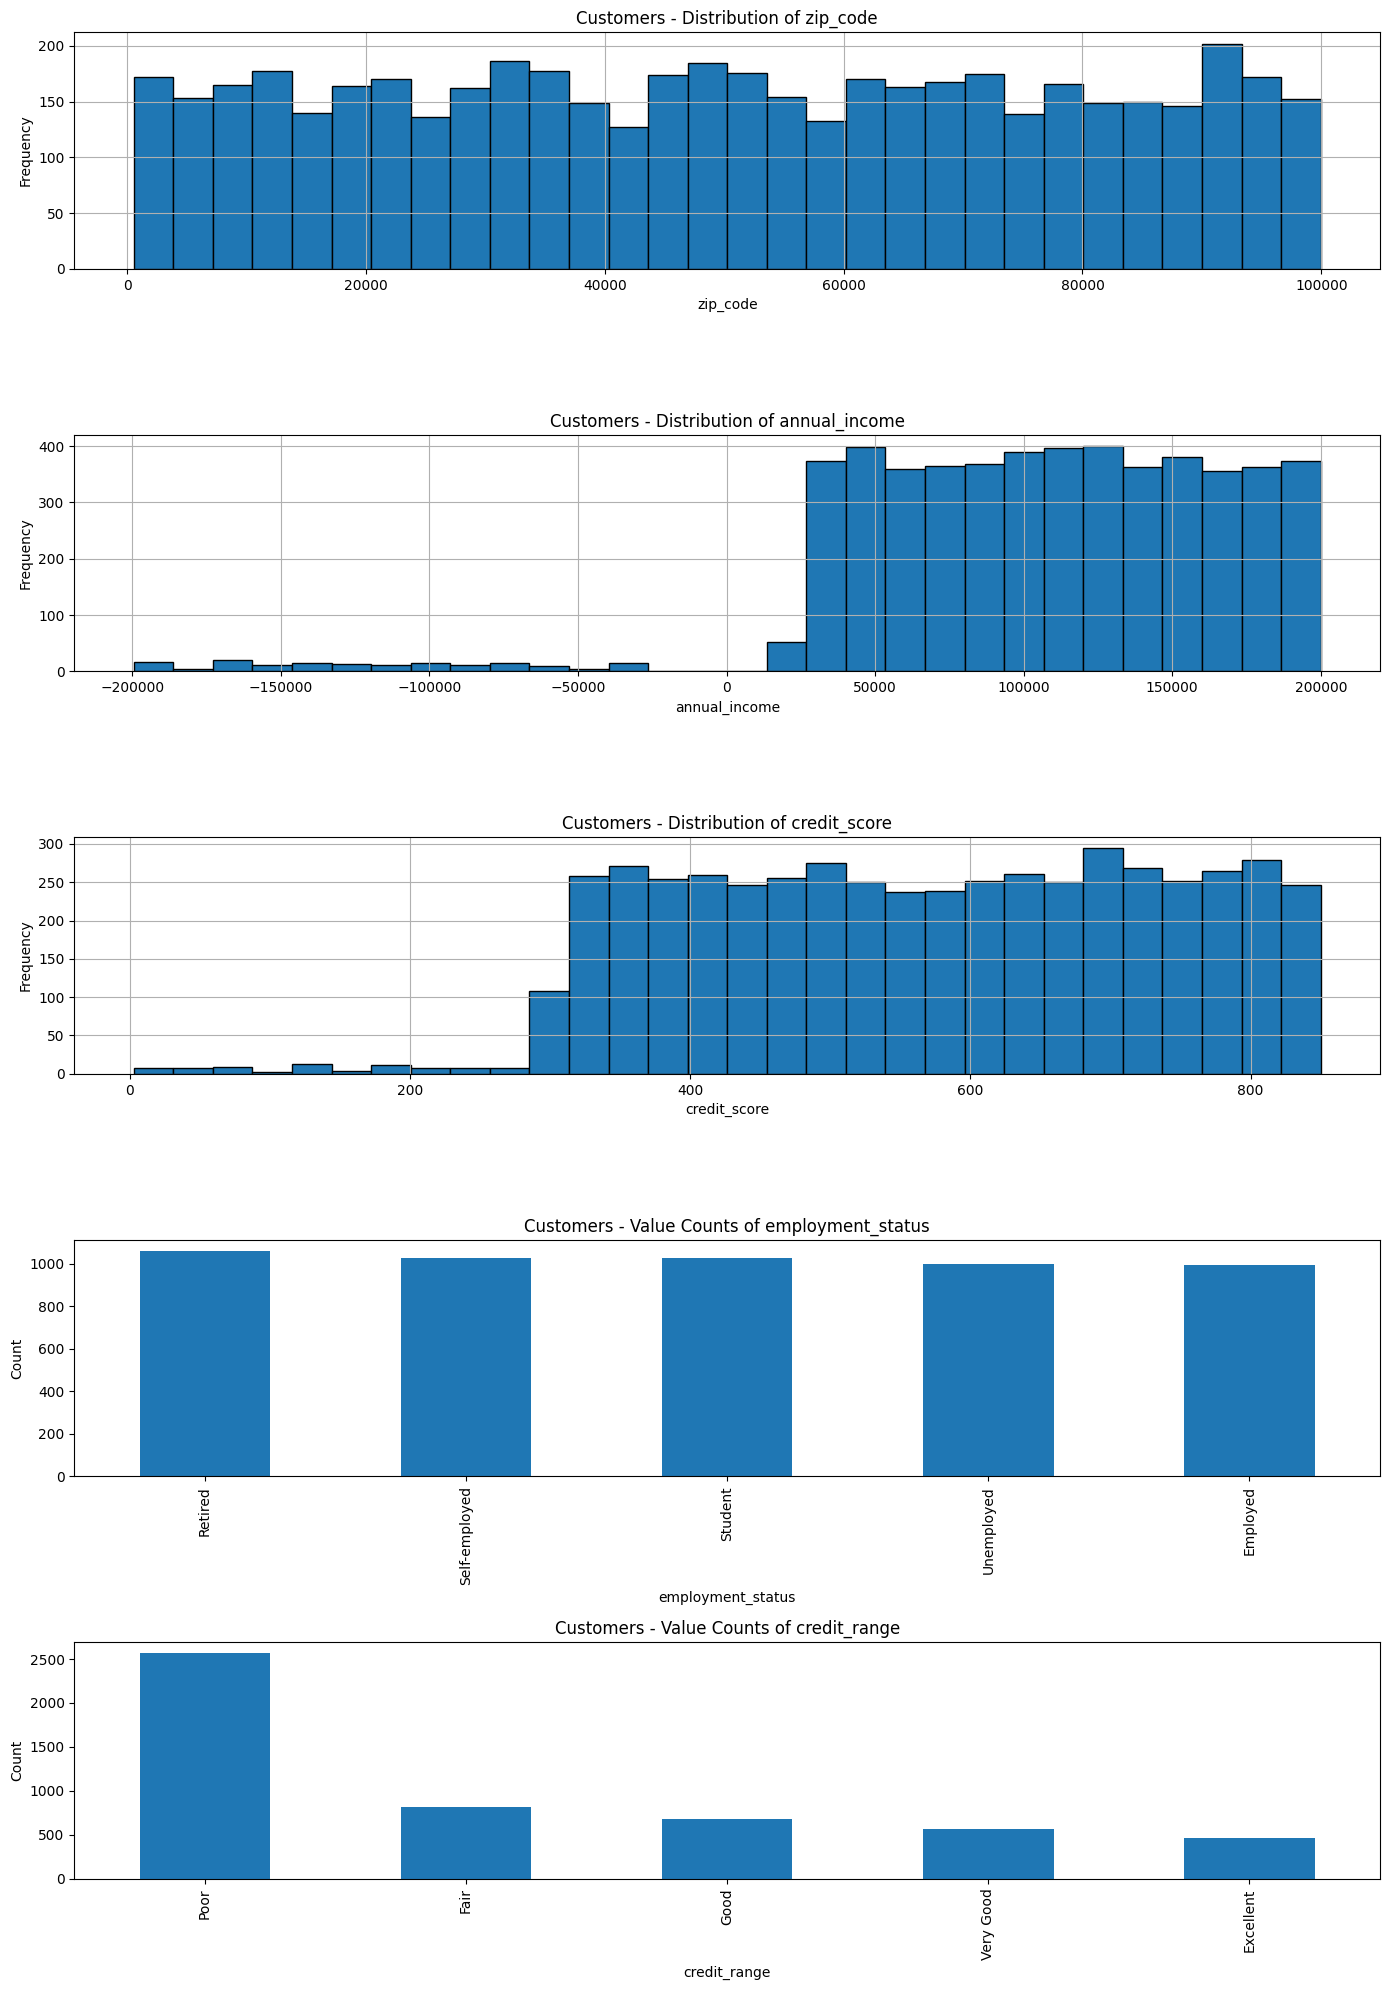

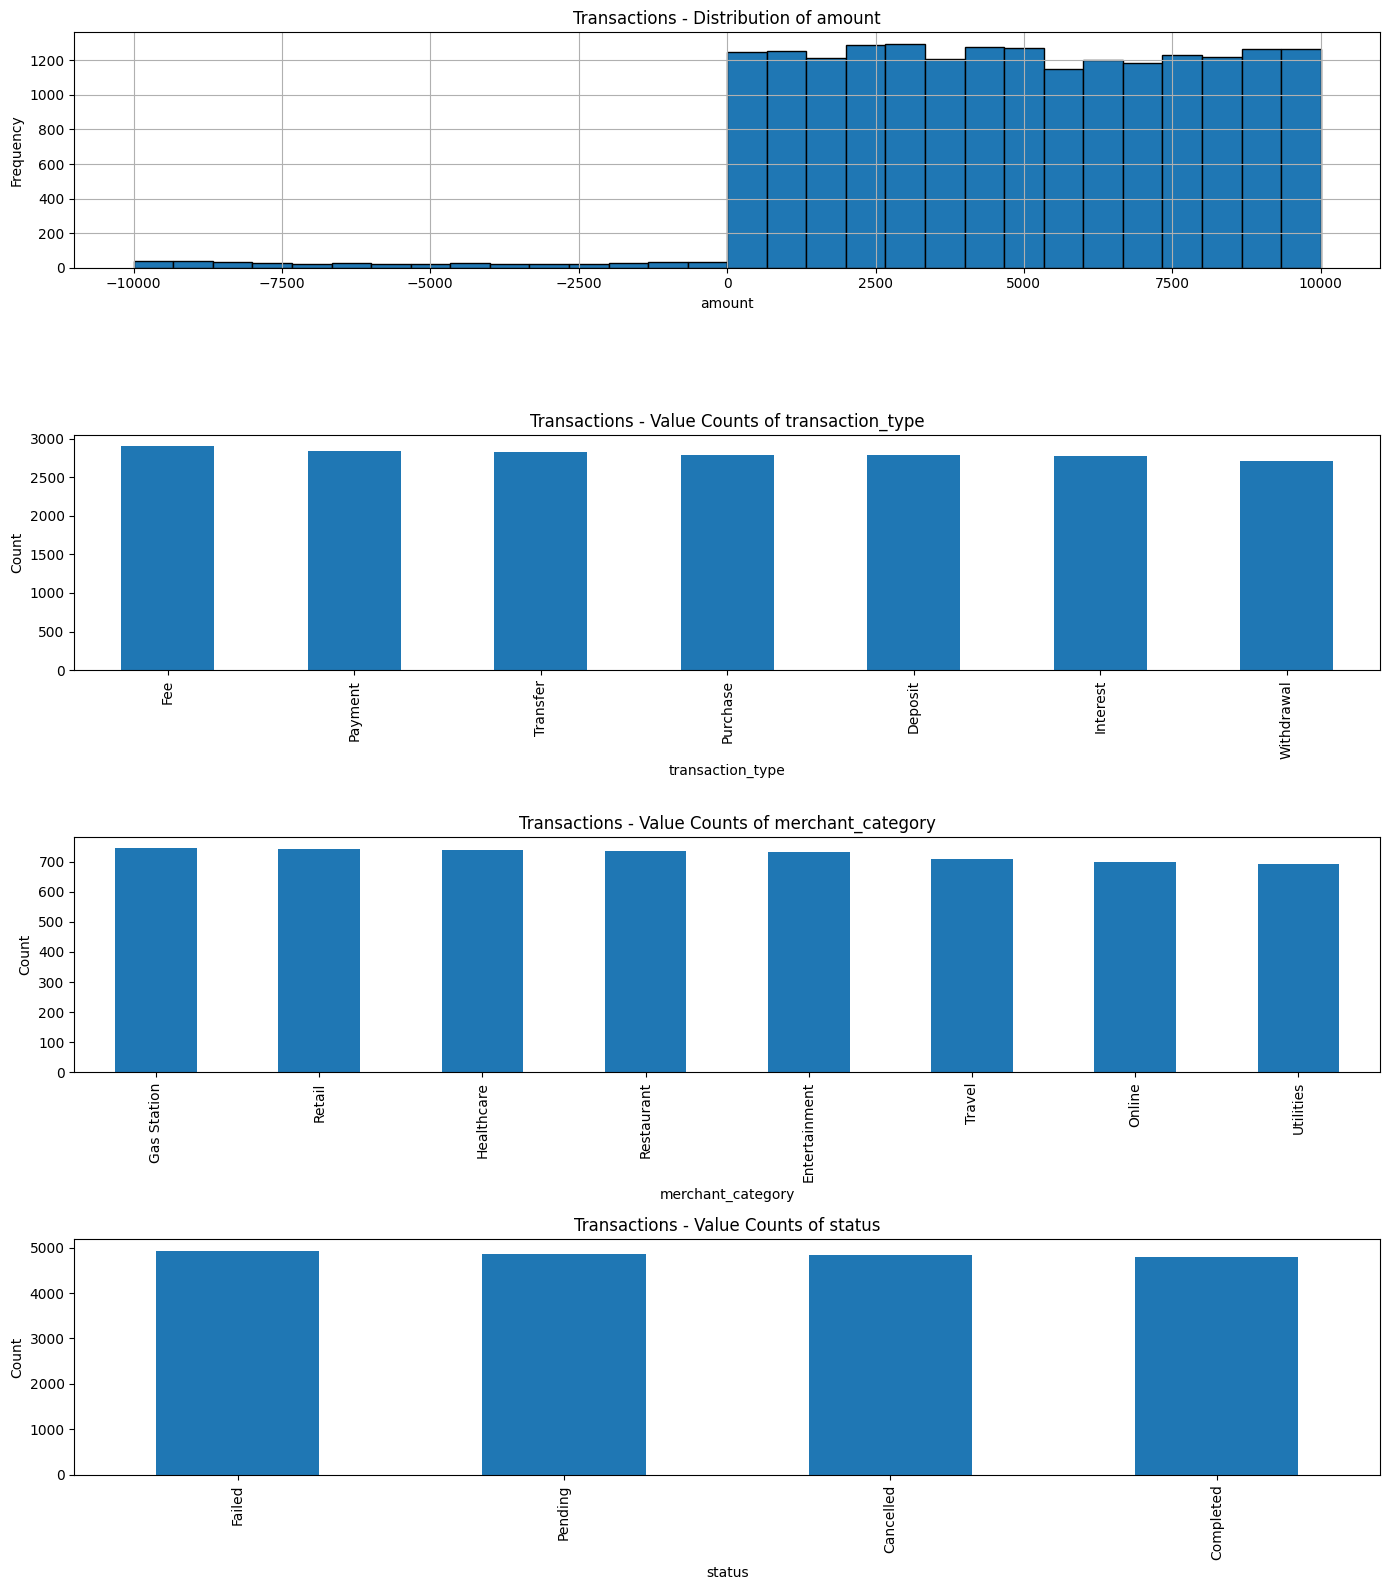

In [39]:
import matplotlib.pyplot as plt

# Visualize distribution of values for each table
def plot_value_distributions(df, table_name, max_unique=20):
    numeric_cols = df.select_dtypes(include=['number']).columns
    categorical_cols = [col for col in df.columns if df[col].dtype == 'object' and df[col].nunique() <= max_unique]

    plt.figure(figsize=(14, 4 * (len(numeric_cols) + len(categorical_cols))))
    plot_num = 1

    for col in numeric_cols:
        plt.subplot(len(numeric_cols) + len(categorical_cols), 1, plot_num)
        df[col].hist(bins=30, edgecolor='black')
        plt.title(f"{table_name} - Distribution of {col}")
        plt.xlabel(col)
        plt.ylabel("Frequency")
        plot_num += 1

    for col in categorical_cols:
        plt.subplot(len(numeric_cols) + len(categorical_cols), 1, plot_num)
        df[col].value_counts().plot(kind='bar')
        plt.title(f"{table_name} - Value Counts of {col}")
        plt.xlabel(col)
        plt.ylabel("Count")
        plot_num += 1

    plt.tight_layout()
    plt.show()

plot_value_distributions(ac, "Accounts")
plot_value_distributions(ch, "Credit History")
plot_value_distributions(ctr, "Customers")
plot_value_distributions(trns, "Transactions")
